In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('tem_survey_clean.csv')

In [4]:
df.head()

,Timestamp,Language,P1Q1,P1Q2,P1Q3,P1 Overall,P2Q1,P2Q2,P2Q3,P2 Overall,P3Q1,P3Q2,P3Q3,P3 Overall,P4Q1,P4Q2,P4Q3,P4 Overall,Overall,Comment
0,2020-03-23 17:57:29,English,2.50,2.50,5.00,3.333333,2.50,2.50,3.75,2.916667,5.00,3.75,5.0,4.583333,5.00,5.00,5.00,5.000000,8,NaN
1,2020-03-27 09:52:05,Thai,2.50,3.75,3.75,3.333333,2.50,0.00,1.25,1.250000,3.75,2.50,2.5,2.916667,3.75,0.00,1.25,1.666667,6,ควรมีระบบเลือกวิชาได้แบบเป็น tab แทนที่ต้องกลั...
2,2020-03-27 10:38:26,English,3.75,5.00,3.75,4.166667,2.50,2.50,2.50,2.500000,3.75,3.75,2.5,3.333333,3.75,2.50,2.50,2.916667,8,NaN
3,2020-03-27 10:42:39,Thai,1.25,1.25,2.50,1.666667,3.75,2.50,2.50,2.916667,3.75,3.75,2.5,3.333333,2.50,2.50,2.50,2.500000,6,NaN
4,2020-03-27 10:45:40,Thai,2.50,3.75,5.00,3.750000,5.00,3.75,2.50,3.750000,5.00,3.75,2.5,3.750000,5.00,1.25,3.75,3.333333,7,ตรงหน้าแรกสุดที่จะมีหน้าต่างฟ้าๆเตือนว่ามีงานอ...


In [5]:
#The timestamp and comment are unnecessary 
df = df.drop(['Timestamp', 'Comment'], axis=1)

**Finding average score based on questions**

In [6]:
q1 = ['P'+str(x)+'Q1' for x in range(1,5)]
q2 = ['P'+str(x)+'Q2' for x in range(1,5)]
q3 = ['P'+str(x)+'Q3' for x in range(1,5)]

In [7]:
for i,question in enumerate([q1,q2,q3]):
    df['Q'+str(i+1)+' Overall'] = df[question].sum(axis=1)/4

In [8]:
df.head()

,Language,P1Q1,P1Q2,P1Q3,P1 Overall,P2Q1,P2Q2,P2Q3,P2 Overall,P3Q1,...,P3Q3,P3 Overall,P4Q1,P4Q2,P4Q3,P4 Overall,Overall,Q1 Overall,Q2 Overall,Q3 Overall
0,English,2.50,2.50,5.00,3.333333,2.50,2.50,3.75,2.916667,5.00,...,5.0,4.583333,5.00,5.00,5.00,5.000000,8,3.7500,3.4375,4.6875
1,Thai,2.50,3.75,3.75,3.333333,2.50,0.00,1.25,1.250000,3.75,...,2.5,2.916667,3.75,0.00,1.25,1.666667,6,3.1250,1.5625,2.1875
2,English,3.75,5.00,3.75,4.166667,2.50,2.50,2.50,2.500000,3.75,...,2.5,3.333333,3.75,2.50,2.50,2.916667,8,3.4375,3.4375,2.8125
3,Thai,1.25,1.25,2.50,1.666667,3.75,2.50,2.50,2.916667,3.75,...,2.5,3.333333,2.50,2.50,2.50,2.500000,6,2.8125,2.5000,2.5000
4,Thai,2.50,3.75,5.00,3.750000,5.00,3.75,2.50,3.750000,5.00,...,2.5,3.750000,5.00,1.25,3.75,3.333333,7,4.3750,3.1250,3.4375


## Data Exploration
I want to explore what factors influenced the user's overall score rating the most.
However, since there is only 64 data, the conclusion will not be accurate

**Display Language** 
<br />
The assumption will be that the language the user used to display myCourseVille will also be the same language they took for the survey because people would typically have a preferred language.

In [9]:
df['Language'].value_counts()

Thai       46
English    18
Name: Language, dtype: int64

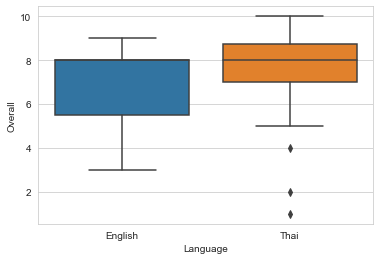

In [10]:
sns.boxplot(x='Language', y='Overall', data=df)

In [11]:
df.groupby('Language').mean()['Overall']

Language
English    6.944444
Thai       7.565217
Name: Overall, dtype: float64

The data suggested that people who possibly displayed the platform in English language on average rated the platform more negatively than people who possibly displayed the platform in Thai. Since the website myCourseVille was implemented mostly to be used by Thai students, this could reflect that the English translation of the interface could be a little awkward for native English speakers. 

**Part**
<br />
Does user concerned most about a specific part/phase of the platform?
<br/><br/>

Part 1 = Signing up <br/>
Part 2 = Finding/Registering course <br/>
Part 3 = Finding assignment<br/>
Part 4 = Submitting assignment<br/>

In [12]:
df[['P1 Overall', 'P2 Overall', 'P3 Overall', 'P4 Overall', 'Overall']].corr()['Overall'].sort_values()

P4 Overall    0.569971
P2 Overall    0.588012
P3 Overall    0.597466
P1 Overall    0.611177
Overall       1.000000
Name: Overall, dtype: float64

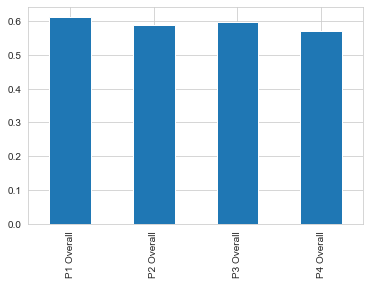

In [13]:
df[['P1 Overall', 'P2 Overall', 'P3 Overall', 'P4 Overall', 'Overall']].corr()['Overall'].drop('Overall').plot.bar()

Since the correlations between the average score given to each part and the overall score are nearly equal, there does not seem to be any specific part/phase the user is mostly concerned about when giving overall score.

**Question = Aspect**<br/>
Is there a certain aspect the user mostly concerned about when giving overall score?
<br/><br/>
Q1 = Ease of use<br/>
Q2 = Awkwardness<br/>
Q3 = Well integrated

In [14]:
df[['Q1 Overall', 'Q2 Overall', 'Q3 Overall', 'Overall']].corr()['Overall'].sort_values()

Q2 Overall    0.553148
Q3 Overall    0.610292
Q1 Overall    0.669029
Overall       1.000000
Name: Overall, dtype: float64

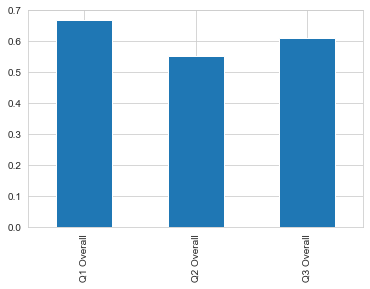

In [15]:
df[['Q1 Overall', 'Q2 Overall', 'Q3 Overall', 'Overall']].corr()['Overall'].drop('Overall').plot.bar()

Since the correlation between score of Q1 and overall score is highest, the data suggested that the user may concern the most about the platform being easy to use. Therefore, the UX/UI team may need to focus on this area when implementing new features.

## Machine Learning & Deep Learning
The amount of data is way too small to create a reliable model, so this part is just for fun

**Pre-processing**

In [16]:
#Dropping all the average columns based on part/question
df = df.drop(['P1 Overall', 'P2 Overall', 'P3 Overall', 'P4 Overall', 'Q1 Overall', 'Q2 Overall', 'Q3 Overall'], axis=1)

In [17]:
df.head()

,Language,P1Q1,P1Q2,P1Q3,P2Q1,P2Q2,P2Q3,P3Q1,P3Q2,P3Q3,P4Q1,P4Q2,P4Q3,Overall
0,English,2.50,2.50,5.00,2.50,2.50,3.75,5.00,3.75,5.0,5.00,5.00,5.00,8
1,Thai,2.50,3.75,3.75,2.50,0.00,1.25,3.75,2.50,2.5,3.75,0.00,1.25,6
2,English,3.75,5.00,3.75,2.50,2.50,2.50,3.75,3.75,2.5,3.75,2.50,2.50,8
3,Thai,1.25,1.25,2.50,3.75,2.50,2.50,3.75,3.75,2.5,2.50,2.50,2.50,6
4,Thai,2.50,3.75,5.00,5.00,3.75,2.50,5.00,3.75,2.5,5.00,1.25,3.75,7


In [18]:
#Get a dummy variable for language
df = pd.concat([df,pd.get_dummies(df['Language'], drop_first=True)], axis=1)
df = df.drop('Language', axis=1)

In [19]:
df.head()

,P1Q1,P1Q2,P1Q3,P2Q1,P2Q2,P2Q3,P3Q1,P3Q2,P3Q3,P4Q1,P4Q2,P4Q3,Overall,Thai
0,2.50,2.50,5.00,2.50,2.50,3.75,5.00,3.75,5.0,5.00,5.00,5.00,8,0
1,2.50,3.75,3.75,2.50,0.00,1.25,3.75,2.50,2.5,3.75,0.00,1.25,6,1
2,3.75,5.00,3.75,2.50,2.50,2.50,3.75,3.75,2.5,3.75,2.50,2.50,8,0
3,1.25,1.25,2.50,3.75,2.50,2.50,3.75,3.75,2.5,2.50,2.50,2.50,6,1
4,2.50,3.75,5.00,5.00,3.75,2.50,5.00,3.75,2.5,5.00,1.25,3.75,7,1


**Machine Learning**

In [20]:
X = df.drop('Overall', axis=1)
y = df['Overall']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
std_scaler = StandardScaler().fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression().fit(X_train, y_train)

In [27]:
prediction = lm.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [29]:
mean_absolute_error(y_test, prediction)

1.2069921650109123

In [30]:
mean_squared_error(y_test, prediction)**0.5

1.7559126165997387

In [31]:
explained_variance_score(y_test, prediction)

-0.05998606323139799

The explained variance is actually negative, meaning that our model is unfit to be used

**Deep Learning**

In [32]:
X = df.drop('Overall', axis=1).values
y = df['Overall'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
min_max_scaler = MinMaxScaler().fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

C:\Users\Poom\Anaconda3\envs\ex\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Poom\Anaconda3\envs\ex\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Poom\Anaconda3\envs\ex\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Poom\Anaconda3\envs\ex\lib\site-packages\tensorflow\python\framework\dtypes.

In [36]:
X_train.shape

(51, 13)

In [37]:
model = Sequential()

model.add(Dense(13, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [40]:
model.fit(x=X_train, y=y_train, batch_size=16, callbacks=[early_stop], validation_data=(X_test, y_test), epochs=1000)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 51 samples, validate on 13 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
51/51 [==============================] - 0s 10ms/sample - loss: 55.6923 - val_loss: 59.5195
Epoch 2/1000
51/51 [==============================] - 0s 176us/sample - loss: 54.3829 - val_loss: 58.9180
Epoch 3/1000
51/51 [==============================] - 0s 157us/sample - loss: 54.0094 - val_loss: 58.3001
Epoch 4/1000
51/51 [==============================] - 0s 196us/sample - loss: 55.1701 - val_loss: 57.6921
Epoch 5/1000
51/51 [==============================] - 0s 138us/sample - loss: 53.5046 - val_loss: 57.0774
Epoch 6/1000
51/51 [==============================] - 0s 215us/sample - loss: 53.9614 - val_loss: 56.4760
Epoch 7/1000
51/51 [==============================] - 0s 137us/sample - loss: 52.8900 - val_loss: 55.8883
Epoc

51/51 [==============================] - 0s 117us/sample - loss: 15.7099 - val_loss: 7.6068
Epoch 69/1000
51/51 [==============================] - 0s 137us/sample - loss: 16.7638 - val_loss: 7.2706
Epoch 70/1000
51/51 [==============================] - 0s 117us/sample - loss: 21.1134 - val_loss: 6.9699
Epoch 00070: early stopping


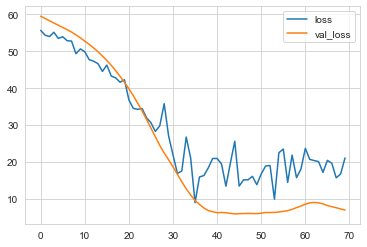

In [41]:
pd.DataFrame(model.history.history).plot()

In [42]:
prediction = model.predict(X_test)

In [43]:
mean_absolute_error(y_test, prediction)

2.427505273085374

In [44]:
mean_squared_error(y_test, prediction)**0.5

2.640055419086336

In [45]:
explained_variance_score(y_test, prediction)

0.3001064344528046

Although the error is larger with deep learning, the model has a better explained variance score